# Kaggle Project - Home Price Advanced Regression Techniques
# Part 1 - Data Cleaning

## Table of Content
[Step 1 - Import Libraries](#Step-1---Import-Libraries)<br/>
[Step 2 - Import Data](#Step-2---Import-Data)<br/>
[Step 3 - Missing Data](#Step-3---Missing-Data)<br/>
>[3.1 - Missing Data Overview](#3.1---Missing-Data-Overview)<br/>
>[3.2 - `MSZoning`](#3.2---MSZoning)<br/>
>[3.3 - `Utilities`](#3.3---Utilities)<br/>
>[3.4 - `Exterior1st` & `Exterior2nd`](#3.4---Exterior1st-&-Exterior2nd)<br/>
>[3.5 - `MasVnrType`](#3.5---MasVnrType)<br/>
>[3.6 - `BsmtQual`](#3.6---BsmtQual)<br/>
>[3.7 - `BsmtExposure`](#3.7---BsmtExposure)<br/>
>[3.8 - `BsmtCond`](#3.8---BsmtCond)<br/>
>[3.9 - `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath`, and `BsmtHalfBath`](#3.9---BsmtFinSF1,-BsmtFinSF2,-BsmtUnfSF,-TotalBsmtSF,-BsmtFullBath,-and-BsmtHalfBath)<br/>
>[3.10 - `KitchenQual`](#3.10---KitchenQual)<br/>
>[3.11 - `Functional`](#3.11---Functional)<br/>
>[3.12 - `GarageYrBlt`, `GarageFinish`, `GarageCars`, `GarageArea`, `GarageQual`,  and `GarageCond`](#3.12---GarageYrBlt,-GarageFinish,-GarageCars,-GarageArea,-GarageQual,-and-GarageCond)<br/>
>[3.13 - `SaleType`](#3.13---SaleType)<br/>
>[3.14 - Final Check](#3.14---Final-Check)

## Summary

Below is a summary of description of `NaN`, missing data, decision to the missing value, as well as the pre- and post-clean data comparison. The detail reasoning for missing value solutions are discussed in subsections under **Step 3**.

**Features with `NaN`**|**Pre-clean Train**|**Pre-clean Test**|**Description of `NaN`**|**Missing Value**|**Replacing Value**|**Post-clean Train**|**Post-clean Test**
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
MSZoning|0|4|Missing Data|Id: 1916, 2217, 2251, 2905|RL|0|0
LotFrontage|259|227|Property does not face street|--|--|259|227
Alley|1369|1352|No Alley|--|--|1369|1352
Utilities|0|2|Missing Data|Id: 1916, 1946|AllPub|0|0
Exterior1st|0|1|Missing Data|Id: 2152|Plywood|0|0
Exterior2nd|0|1|Missing Data|Id: 2152|Plywood|0|0
MasVnrType|8|16|None|Id: 2611|BrkFace|8|15
MasVnrArea|8|15|None|--|--|8|15
BsmtQual|37|44|No Basement|Id: 2218, 2219|2218: 'Fa', 2219: 'TA'|37|42
BsmtCond|37|45|No Basement|Id: 2041, 2186, 2525|TA|37|42
BsmtExposure|38|44|No Basement|Id: 949, 1488, 2349|No|37|42
BsmtFinType1|37|42|No Basement|--|--|37|42
BsmtFinSF1|0|1|Missing Data|Id: 2121|0|0|0
BsmtFinType2|38|42|No Basement|--|--|38|42
BsmtFinSF2|0|1|Missing Data|Id: 2121|0|0|0
BsmtUnfSF|0|1|Missing Data|Id: 2121|0|0|0
TotalBsmtSF|0|1|Missing Data|Id: 2121|0|0|0
BsmtFullBath|0|2|Missing Data|Id: 2121, 2189|0|0|0
BsmtHalfBath|0|2|Missing Data|Id: 2121, 2189|0|0|0
KitchenQual|0|1|Missing Data|Id: 1556|TA|0|0
Functional|0|2|Missing Data|Id: 2217, 2474|2217: Mod, 2474: Typ|0|0
FireplaceQu|690|730|No Fireplace|--|--|690|730
GarageType|81|76|No Garrage|--|--|81|76
GarageYrBlt|81|78|No Garrage|Id: 2127, 2577|YearBuilt|81|76
GarageFinish|81|78|No Garrage|Id: 2127, 2577|Unf|81|76
GarageCars|0|1|Missing Data|Id: 2577|1|0|0
GarageArea|0|1|Missing Data|Id: 2577|384|0|0
GarageQual|81|78|No Garrage|Id: 2127, 2577|TA|81|76
GarageCond|81|78|No Garrage|Id: 2127, 2577|TA|81|76
PoolQC|1453|1456|No Pool|--|--|1453|1456
Fence|1179|1169|No Fence|--|--|1179|1169
MiscFeature|1406|1408|No MF|--|--|1406|1408
SaleType|0|1|Missing Data|id: 2490|WD|0|0

## Step 1 - Import Libraries

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step 2 - Import Data

In [162]:
# Import train and test data and check the data sizes
train = pd.read_csv('../data/train.csv', index_col='Id')
test = pd.read_csv('../data/test.csv', index_col='Id')
# Name the dataframes
train.name = 'train'
test.name = 'test'
print(f'Train set shape: {train.shape}.')
print(f'Test set shape: {test.shape}.')

Train set shape: (1460, 80).
Test set shape: (1459, 79).


## Step 3 - Missing Data

In [163]:
# Set the size of display large enough to view all features
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [164]:
train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [165]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 3.1 - Missing Data Overview

In [166]:
# function and libraries for displaying dataframes side by side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
    
# missing values dataframes
df_missing_train = pd.DataFrame(train.isna().sum(), columns=['train_missing'])
df_missing_test = pd.DataFrame(test.isna().sum(), columns=['test_missing'])

# display missing dataframes side by side
display_side_by_side(df_missing_train, df_missing_test)

,train_missing
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


**Meaning of NaN**
1. MSZoning - **Not a meaningful categorical value => explore further**
2. LogFrontage - property not facing street
3. Alley - No Alley
4. Utilities - **Not a meaningful categorical value => explore further**
5. Exterior1st & Exterior2nd - **Not a meaningful categorical value => explore further**
6. MasVnrType & MasVnrArea - None. 
   **For test data: MasVnrArea != MasVnrType => 1 missing value for MasVnrType**
7. BsmtQual/BsmtCond/BsmtExposure/BsmtFinType1/BsmtFinType2 - No Basement. 
   **For Train: 1 missing value at BsmtExposure**
   **For Test: potential 3 missing values**
8. Electrical: **Not a meaningful categorical value => explore further**
9. BsmgFullBath: **Not a meaningful categorical value => explore further**
10. KitchenQual: **Not a meaningful categorical value => explore further**
11. FireplaceQu: No fireplace
12. GarageType/GarageYrBlt/GarageFinish/GarageQual/GarageCond: No Garage. 
    **For Test: 2 missing values** 
13. **GarageCars/GarageArea: 1 Missing Value**
14. PoolQC: No Pool
15. Fence: No Fence
16. MiscFeature: No MF
17. SaleType: **Not a meaningful categorical value => explore further**

### 3.2 - `MSZoning`

The **test** set has **4** properties missing value for `MSZoning`

#### Find Missing Values

In [167]:
# Display missing data for MSZoning
test[test['MSZoning'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


#### Exploration

In [168]:
# Check unique values
def unique_count(dfs, features):
    '''
    Function prints the unique value counts for features
    Input: 
          dfs: list of dataframes
          featuers: list of features
    '''
    for df in dfs:
        for feature in features:
            print(f'Unique value count for {feature} in {df.name} set.')
            display(df[feature].value_counts(dropna=False))
            
# Print unique values            
unique_count(dfs=[train, test], features=['MSZoning'])

Unique value count for MSZoning in train set.


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Unique value count for MSZoning in test set.


RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

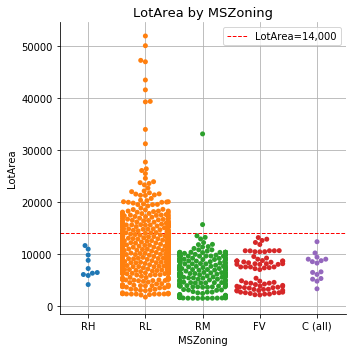

In [169]:
# Swam plot to explore the relationship between MSZoning and LotArea
sns.catplot(data=test, x='MSZoning', y='LotArea', kind='swarm')
plt.axhline(y=14000, color='r', lw=1, linestyle='--', label='LotArea=14,000')
plt.grid()
plt.title('LotArea by MSZoning', fontsize=13)
plt.legend()
plt.tight_layout()
plt.show();

#### Solution

The `lotArea` 4 properties (in test data) with `NaN` for `MSZoing` are above 14,000 sqft. Based on the plot above, it is reasonable to label these four properties are with `RL` (Residential Low Density).  

In [170]:
# Replace NaN with RL in Test Set
test['MSZoning'].replace(np.nan, 'RL', inplace=True)
unique_count(dfs=[test], features=['MSZoning'])

Unique value count for MSZoning in test set.


RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

### 3.3 - `Utilities`

#### Find Missing Values

In [171]:
# Display missing data for MSZoning
test[test['Utilities'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,RL,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal


The **test** set has **2** properties missing value for `Utilities`

#### Exploration

In [172]:
# Check unique values
unique_count(dfs=[train, test], features=['Utilities'])

Unique value count for Utilities in train set.


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Unique value count for Utilities in test set.


AllPub    1457
NaN          2
Name: Utilities, dtype: int64

#### Solution

Based on the count above, the value for `Utilities` of majority of the property (except one in the train set) are `AllPub`. Replacing both `NaN` with `AllPub` is reasonable.

In [173]:
# Replace 'NaN' with 'AllPub' and check value counts
test['Utilities'].replace(np.nan, 'AllPub', inplace=True)
unique_count(dfs=[test], features=['Utilities'])

Unique value count for Utilities in test set.


AllPub    1459
Name: Utilities, dtype: int64

### 3.4 - `Exterior1st` & `Exterior2nd`

#### Find Missing Values

In [174]:
# Display missing data for MSZoning
display(test[test['Exterior1st'].isna()])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


#### Exploration

In [175]:
# Check unique values
unique_count(dfs=[test], features=['Exterior1st','Exterior2nd'])

Unique value count for Exterior1st in test set.


VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
NaN          1
Name: Exterior1st, dtype: int64

Unique value count for Exterior2nd in test set.


VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
NaN          1
Name: Exterior2nd, dtype: int64

In [176]:
# Exterior1st value when Roof Style is 'Flat' and roof material is 'Tar&Grv'
print('Train set')
display(train[(train['RoofStyle']=='Flat') & (train['RoofMatl']=='Tar&Grv')]['Exterior1st'].value_counts())
print('Test set')
display(test[(test['RoofStyle']=='Flat') & (test['RoofMatl']=='Tar&Grv')]['Exterior1st'].value_counts())

Train set


Plywood    5
Wd Sdng    3
BrkComm    1
WdShing    1
Name: Exterior1st, dtype: int64

Test set


Plywood    4
Wd Sdng    1
WdShing    1
Name: Exterior1st, dtype: int64

In [177]:
# Exterior2nd value when Roof Style is 'Flat' and roof material is 'Tar&Grv'
print('Train set')
display(train[(train['RoofStyle']=='Flat') & (train['RoofMatl']=='Tar&Grv')]['Exterior2nd'].value_counts())
print('Test set')
display(test[(test['RoofStyle']=='Flat') & (test['RoofMatl']=='Tar&Grv')]['Exterior2nd'].value_counts())

Train set


Plywood    6
Wd Sdng    3
Brk Cmn    1
Name: Exterior2nd, dtype: int64

Test set


Plywood    2
Wd Shng    2
Wd Sdng    1
CBlock     1
Name: Exterior2nd, dtype: int64

#### Solution

After explore potential relationship between property exterior with other variables. I look at the property with same roof style and material and choose the most frequently used material - `Plywood` to replace `NaN`.

In [178]:
# Replace NaN with Plywood
test['Exterior1st'].replace(np.nan, 'Plywood', inplace=True)
test['Exterior2nd'].replace(np.nan, 'Plywood', inplace=True)

# Check unique value count after the replacement
unique_count(dfs=[test], features=['Exterior1st','Exterior2nd'])

Unique value count for Exterior1st in test set.


VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    114
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

Unique value count for Exterior2nd in test set.


VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    129
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
Stone        1
AsphShn      1
Name: Exterior2nd, dtype: int64

### 3.5 - `MasVnrType`

#### Find Missing Values

In [179]:
# Display missing data for MSZoning
display(test[test['MasVnrType'].isna()])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1707,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
1883,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,840.0,840.0,GasA,Ex,Y,SBrkr,840,885,0,1725,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,550.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
1993,60,RL,NaN,7750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,707.0,707.0,GasA,Ex,Y,SBrkr,707,707,0,1414,0.0,0.0,2,1,3,1,Gd,6,Typ,1,Gd,Attchd,2002.0,Fin,2.0,403.0,TA,TA,Y,100,35,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
2005,20,RL,87.0,10037,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
2042,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Ex,Y,SBrkr,952,860,0,1812,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,469.0,TA,TA,Y,144,112,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
2312,60,RL,59.0,15810,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,768.0,768.0,GasA,Ex,Y,SBrkr,768,728,0,1496,0.0,0.0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Unf,2.0,572.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
2326,80,RL,NaN,11950,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Ex,Y,SBrkr,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2003.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
2341,20,RL,85.0,9965,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,Ex,Y,SBrkr,1528,0,0,1528,0.0,0.0,3,2,3,1,Gd,6,Typ,1,TA,Attchd,2007.0,Unf,2.0,480.0,TA,TA,Y,0,228,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial


Id '2611' misses value for 'MasVnrType'

#### Exploration

In [180]:
# Check unique values
unique_count(dfs=[test], features=['MasVnrType'])

Unique value count for MasVnrType in test set.


None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [181]:
# Check unique values in the same neighborhood and when `MasVnrArea` is none zero.
test_mvt=test[(test['MasVnrArea']>0) & (test['Neighborhood']=='Mitchel')]
test_mvt.name='test'
unique_count(dfs=[test_mvt], features=['MasVnrType'])

Unique value count for MasVnrType in test set.


BrkFace    14
Stone       1
NaN         1
Name: MasVnrType, dtype: int64

#### Solution

Replace `NaN` with most frequent value of `MasVnrType`(e.g., `BrkFace`) in the same `Neighborhood` when `MasVnrArea` is **non-zero**.

In [182]:
# Replace NaN with 'BrkFace'
test.loc[2611,'MasVnrType'] = 'BrkFace'
# Confirm NaN is replaced
unique_count(dfs=[test], features=['MasVnrType'])

Unique value count for MasVnrType in test set.


None       878
BrkFace    435
Stone      121
NaN         15
BrkCmn      10
Name: MasVnrType, dtype: int64

### 3.6 - `BsmtQual`

#### Find Missing Value

In [183]:
# Display missing data for MSZoning
display(test[(test['BsmtQual'].isna()) & 
             (test['BsmtFinType1'].notnull())])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2218,70,C (all),60.0,5280,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,7,1895,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Stone,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
2219,50,C (all),52.0,5150,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Norm,1Fam,1.5Fin,4,7,1910,2000,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA,TA,N,FuseA,671,378,0,1049,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1910.0,Unf,1.0,195.0,Po,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal


#### Solution

Replace `NaN` with `BsmtQual` value from properties with same `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, and `BsmtFinType2`

In [184]:
# Selected features
feat = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
test.loc[[2218, 2219], feat]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,
2218,Fa,No,Unf,Unf
2219,TA,No,Unf,Unf


#### <span style="color:blue"><em>2218</em></span>

In [185]:
test[(test['BsmtQual']=='Fa') & 
     (test['BsmtExposure']=='No') &
     (test['BsmtFinType1']=='Unf') &
     (test['BsmtFinType2']=='Unf')]['BsmtQual'].value_counts()

Fa    31
Name: BsmtQual, dtype: int64

`Fa` is the only value.

In [186]:
# Replace NaN with 'Fa'
test.loc[2218, ['BsmtQual']] = 'Fa'
# Confirm the change
display(test.loc[2218, ['BsmtQual']])

BsmtQual    Fa
Name: 2218, dtype: object

#### <span style="color:blue"><em>2219</em></span>

In [187]:
test[(test['BsmtQual']=='TA') & 
     (test['BsmtExposure']=='No') &
     (test['BsmtFinType1']=='Unf') &
     (test['BsmtFinType2']=='Unf')]['BsmtQual'].value_counts()

TA    174
Name: BsmtQual, dtype: int64

`TA` is the only value.

In [188]:
# Replace NaN with 'TA'
test.loc[2219, ['BsmtQual']] = 'TA'
# Confirm the change
display(test.loc[2219, ['BsmtQual']])

BsmtQual    TA
Name: 2219, dtype: object

### 3.7 - `BsmtExposure`

#### Find Missing Values

In [189]:
# Display missing data
display(train[(train['BsmtExposure'].isna()) & 
              (train['BsmtFinType1'].notnull())])
display(test[(test['BsmtExposure'].isna()) & 
             (test['BsmtFinType1'].notnull())])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1488,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2349,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial


#### Solution

Replace `NaN` with `BsmtExposure` value from properties with same `BsmtCond`, `BsmtQual`, `BsmtFinType1`, and `BsmtFinType2`

In [190]:
# Selected features
feat = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']

#### <span style="color:blue"><em>949</em></span>

In [191]:
train.loc[949, feat]

BsmtQual         Gd
BsmtCond         TA
BsmtFinType1    Unf
BsmtFinType2    Unf
Name: 949, dtype: object

In [192]:
train[(train['BsmtQual']=='Gd') & 
      (train['BsmtCond']=='TA') &
      (train['BsmtFinType1']=='Unf') &
      (train['BsmtFinType2']=='Unf')]['BsmtExposure'].value_counts()

No    136
Av     26
Mn     10
Gd      5
Name: BsmtExposure, dtype: int64

`No` dominates.

In [193]:
# Replace NaN with 'No'
train.loc[949, ['BsmtExposure']] = 'No'
# Confirm the change
display(train.loc[949, ['BsmtExposure']])

BsmtExposure    No
Name: 949, dtype: object

#### <span style="color:blue"><em>1488 & 2349</em></span>

In [194]:
test.loc[[1488, 2349], feat]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2
Id,,,,
1488,Gd,TA,Unf,Unf
2349,Gd,TA,Unf,Unf


In [195]:
test[(test['BsmtQual']=='Gd') & 
     (test['BsmtCond']=='TA') &
     (test['BsmtFinType1']=='Unf') &
     (test['BsmtFinType2']=='Unf')]['BsmtExposure'].value_counts()

No    119
Av     32
Mn     12
Gd      5
Name: BsmtExposure, dtype: int64

`No` dominates.

In [196]:
# Replace NaN with 'No'
test.loc[[1488, 2349], ['BsmtExposure']] = 'No'
# Confirm the change
display(test.loc[[1488, 2349], ['BsmtExposure']])

,BsmtExposure
Id,
1488,No
2349,No


### 3.8 - `BsmtCond`

#### Find Missing Values

In [197]:
# Display missing data for MSZoning
display(test[(test['BsmtCond'].isna()) & 
             (test['BsmtQual'].notnull())])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2041,20,RL,103.0,16280,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,8,9,1976,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Ex,Ex,CBlock,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,GasA,Ex,Y,SBrkr,1671,0,0,1671,1.0,0.0,3,0,3,1,Ex,6,Typ,1,Gd,Attchd,1976.0,RFn,2.0,550.0,TA,TA,Y,280,90,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal
2186,20,RL,65.0,6500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,6,1976,1976,Hip,CompShg,HdBoard,Plywood,BrkFace,84.0,TA,TA,CBlock,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,GasA,TA,Y,SBrkr,1127,0,0,1127,0.0,1.0,1,1,3,1,TA,6,Typ,1,Po,Detchd,1991.0,Unf,2.0,480.0,TA,TA,Y,0,0,138,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
2525,80,RL,72.0,9720,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,7,1977,1977,Gable,CompShg,Plywood,VinylSd,BrkFace,51.0,TA,TA,CBlock,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,GasA,TA,Y,SBrkr,1009,0,0,1009,0.0,0.0,2,0,3,1,TA,6,Typ,1,Fa,Detchd,1977.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal


#### Solution

Replace `NaN` with `BsmtCond` value from properties with same `BsmtQual`, `BsmtExposure`, `BsmtFinType1`, and `BsmtFinType2`

In [198]:
# Selected features
feat = ['BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

#### <span style="color:blue"><em>2041</em></span>

In [199]:
# 2041
test.loc[2041, feat]

BsmtQual         Gd
BsmtExposure     Mn
BsmtFinType1    GLQ
BsmtFinType2    Rec
Name: 2041, dtype: object

In [200]:
test[(test['BsmtQual']=='Gd') & 
     (test['BsmtExposure']=='Mn') &
     (test['BsmtFinType1']=='GLQ') &
     (test['BsmtFinType2']=='Rec')]['BsmtCond'].value_counts()

TA    1
Name: BsmtCond, dtype: int64

In [201]:
# Replace NaN with 'TA' (value from 1693)
test.loc[2041, ['BsmtCond']] = 'TA'
# Confirm the change
display(test.loc[2041, ['BsmtCond']])

BsmtCond    TA
Name: 2041, dtype: object

`TA` is the only value.

#### <span style="color:blue"><em>2186</em></span>

In [202]:
# 2186
test.loc[2186, feat]

BsmtQual         TA
BsmtExposure     No
BsmtFinType1    BLQ
BsmtFinType2    Unf
Name: 2186, dtype: object

In [203]:
test[(test['BsmtQual']=='TA') & 
     (test['BsmtExposure']=='No') &
     (test['BsmtFinType1']=='BLQ') &
     (test['BsmtFinType2']=='Unf')]['BsmtCond'].value_counts()

TA    53
Fa     4
Name: BsmtCond, dtype: int64

`TA` dominates.

In [204]:
# Replace NaN with 'TA' (value from 1693)
test.loc[2186, ['BsmtCond']] = 'TA'
# Confirm the change
display(test.loc[2186, ['BsmtCond']])

BsmtCond    TA
Name: 2186, dtype: object

#### <span style="color:blue"><em>2525</em></span>

In [205]:
# 2525
test.loc[2525, feat]

BsmtQual         TA
BsmtExposure     Av
BsmtFinType1    ALQ
BsmtFinType2    Unf
Name: 2525, dtype: object

In [206]:
test[(test['BsmtQual']=='TA') & 
     (test['BsmtExposure']=='Av') &
     (test['BsmtFinType1']=='ALQ') &
     (test['BsmtFinType2']=='Unf')]['BsmtCond'].value_counts()

TA    14
Name: BsmtCond, dtype: int64

`TA` is the only value.

In [207]:
# Replace NaN with 'TA' (value from 1693)
test.loc[2525, ['BsmtCond']] = 'TA'
# Confirm the change
display(test.loc[2525, ['BsmtCond']])

BsmtCond    TA
Name: 2525, dtype: object

### 3.9 - `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath`, and `BsmtHalfBath`

**Find Missing Values**

In [208]:
# Display missing data
display(test[test['BsmtCond'].isna()])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1586,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Edwards,Feedr,Norm,1Fam,1Story,3,6,1945,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,640,0,0,640,0.0,0.0,1,0,2,1,TA,5,Min1,0,NaN,Detchd,1945.0,Unf,1.0,240.0,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
1594,90,RH,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,Duplex,2Story,4,6,1967,1967,Flat,Tar&Grv,Plywood,CBlock,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,862,1788,0,2650,0.0,0.0,3,0,6,2,TA,10,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,2,2010,WD,Normal
1730,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,2Story,6,7,1981,1981,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,964,918,0,1882,0.0,0.0,2,0,4,2,TA,8,Typ,2,TA,Attchd,1981.0,Unf,2.0,612.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
1779,20,RL,75.0,9533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,140.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1210,0,0,1210,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Attchd,1953.0,Fin,1.0,616.0,TA,TA,Y,208,0,100,0,0,0,NaN,MnPrv,NaN,0,8,2009,ConLD,Normal
1815,30,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseA,612,0,0,612,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1965.0,Unf,1.0,308.0,TA,Fa,N,0,0,25,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1848,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1849,20,RL,NaN,15635,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1383,0,0,1383,0.0,0.0,1,0,2,1,TA,6,Mod,0,NaN,Attchd,1980.0,Unf,2.0,498.0,Fa,TA,Y,0,0,90,0,110,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1857,70,RL,120.0,26400,Pave,NaN,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1858,90,RL,64.0,7018,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,2Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1114,1114,0,2228,0.0,0.0,2,0,6,2,TA,8,Typ,0,NaN,Detchd,1979.0,Unf,2.0,720.0,TA,TA,Y,73,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca


#### Solution

**For Test:**
1. **Id: 2121** - No Basement. `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `BsmtFullBath`, and `BsmtHalfBath` should all be **0**.
2. **Id: 2189** - No Basement. `BsmtFullBath`, and `BsmtHalfBath` should all be **0**.

#### <span style="color:blue"><em>2121</em></span>

In [209]:
# 2121
Feat_2121 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
test.loc[2121, Feat_2121] = 0
display(test.loc[2121, Feat_2121])

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
Name: 2121, dtype: object

#### <span style="color:blue"><em>2189</em></span>

In [210]:
# 2189
Feat_2189 = ['BsmtFullBath', 'BsmtHalfBath']
test.loc[2189, Feat_2189] = 0
display(test.loc[2189, Feat_2189])

BsmtFullBath    0
BsmtHalfBath    0
Name: 2189, dtype: object

### 3.10 - `KitchenQual`

#### Find Missing Values

In [211]:
# Display missing data
display(test[test['KitchenQual'].isna()])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


#### Solution

Match `OverallQual` with `KitchenQual`

In [212]:
test[test['OverallQual']==5]['KitchenQual'].value_counts()

TA    342
Gd     66
Fa     12
Ex      7
Name: KitchenQual, dtype: int64

`TA` dominates.

In [213]:
# Replace NaN with 'TA'
test.loc[1556, ['KitchenQual']] = 'TA'
# Confirm the change
display(test.loc[1556, ['KitchenQual']])

KitchenQual    TA
Name: 1556, dtype: object

### 3.11 - `Functional`

#### Find Missing Values

In [214]:
# Display missing data
display(test[test['Functional'].isna()])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2217,20,RL,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NaN,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NaN,NaN,NaN,0,9,2007,COD,Abnorml


#### Solution

Match `OverallQual` with `KitchenQual`

#### <span style="color:blue"><em>2217</em></span>

In [215]:
test[test['OverallQual']==1]['Functional'].value_counts()

Mod    1
Name: Functional, dtype: int64

`Mod` is the only value.

In [216]:
# Replace NaN with 'TA'
test.loc[2217, ['Functional']] = 'Mod'
# Confirm the change
display(test.loc[2217, ['Functional']])

Functional    Mod
Name: 2217, dtype: object

#### <span style="color:blue"><em>2474</em></span>

In [217]:
test[test['OverallQual']==4]['Functional'].value_counts()

Typ     89
Min2    10
Min1     5
Mod      5
Name: Functional, dtype: int64

`Typ` dominates.

In [218]:
# Replace NaN with 'TA'
test.loc[2474, ['Functional']] = 'Typ'
# Confirm the change
display(test.loc[2474, ['Functional']])

Functional    Typ
Name: 2474, dtype: object

### 3.12 - `GarageYrBlt`, `GarageFinish`, `GarageCars`, `GarageArea`, `GarageQual`, and `GarageCond`

#### Find Missing Values

In [219]:
# Display missing data
display(test[(test['GarageYrBlt'].isna()) & 
             (test['GarageType'].notnull())])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2127,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


#### <span style="color:blue"><em>GarageYrBlt</em></span>

Garage is usually built with the house or added during the remodel.

#### Exploration

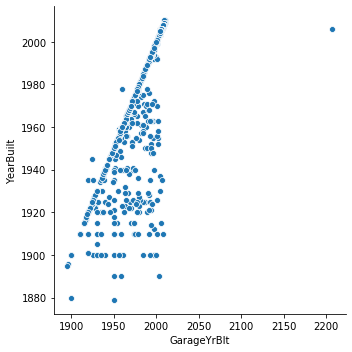

In [220]:
# Relation plot
sns.relplot(data=test, x='GarageYrBlt', y='YearBuilt');

Identified an invalid outlier (data that caused by error and does not make physical sense).

In [221]:
# Locate the invalid outlier
display(test['GarageYrBlt'].sort_values(ascending=False)[:3])

Id
2593    2207.0
1609    2010.0
1503    2010.0
Name: GarageYrBlt, dtype: float64

Id: 2593 - Based on the `YearBuilt` and `YearRemodAdd`, `GarageYrBlt` should be `2007` rather than `2207`

In [222]:
# Correct GarageYrBlt for 2593
test.loc[2593, 'GarageYrBlt'] = 2007
test.loc[2593, 'GarageYrBlt']

2007.0

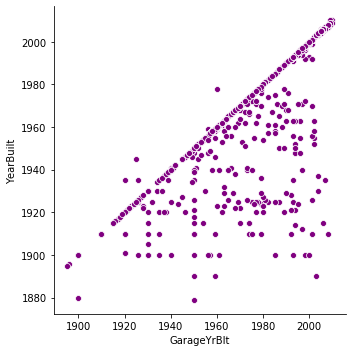

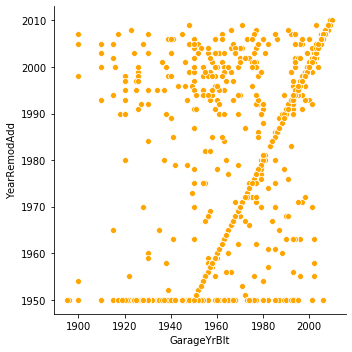

In [223]:
sns.relplot(data=test, x='GarageYrBlt', y='YearBuilt', color='purple')
sns.relplot(data=test, x='GarageYrBlt', y='YearRemodAdd', color='orange')
plt.show();

#### Solution

Both `YearBuilt` and `YearRemodAdd` are good estiamte for the missing values of `GarageYrBlt`. Here I use `YearBuilt`.

In [224]:
# Update 'GarageYrBlt'
test.loc[2127, 'GarageYrBlt'] = test.loc[2127, 'YearBuilt']
test.loc[2577, 'GarageYrBlt'] = test.loc[2577, 'YearBuilt']
display(test.loc[[2127,2577], ['GarageYrBlt']])

,GarageYrBlt
Id,
2127,1910.0
2577,1923.0


#### <span style="color:blue"><em>GarageFinish</em></span>

Choose the most common `GarageFinish` given the `GarageType` in the same `Neighborhood`.

In [225]:
display(test[(test['GarageType']=='Detchd') &
     (test['Neighborhood']=='IDOTRR')]['GarageFinish'].value_counts())
display(test[(test['GarageType']=='Detchd') &
     (test['Neighborhood']=='OldTown')]['GarageFinish'].value_counts())

Unf    32
RFn     3
Fin     3
Name: GarageFinish, dtype: int64

Unf    91
RFn     2
Fin     2
Name: GarageFinish, dtype: int64

`Unf` dominates.

In [226]:
# Update 'GarageFinish'
test.loc[[2127,2577], ['GarageFinish']] = 'Unf'
display(test.loc[[2127,2577], ['GarageFinish']])

,GarageFinish
Id,
2127,Unf
2577,Unf


#### <span style="color:blue"><em>GarageCars & GarageArea</em></span>

**Id: 2577** only. Match `Neighborhood`, `BedroomAbvGr` and `GarageType`

In [227]:
display(test[(test['GarageType']=='Detchd') &
             (test['Neighborhood']=='IDOTRR') &
             (test['BedroomAbvGr']==3)]['GarageCars'].value_counts())

1.0    9
2.0    6
Name: GarageCars, dtype: int64

`1.0` dominates.

In [228]:
# GarageArea for 1 car garage.
display(test[(test['GarageType']=='Detchd') &
             (test['Neighborhood']=='IDOTRR') &
             (test['GarageCars']==1)]['GarageArea'].value_counts())

384.0    3
308.0    3
200.0    2
195.0    2
216.0    2
360.0    1
625.0    1
330.0    1
280.0    1
240.0    1
272.0    1
215.0    1
288.0    1
299.0    1
264.0    1
100.0    1
256.0    1
390.0    1
185.0    1
Name: GarageArea, dtype: int64

`384` and `308` dominate. I choose `384`.

In [229]:
# Update 'GarageCars' and `GarageArea`
test.loc[2577, ['GarageCars']] = 1
test.loc[2577, ['GarageArea']] = 384
display(test.loc[2577, ['GarageCars', 'GarageArea']])

GarageCars      1
GarageArea    384
Name: 2577, dtype: object

#### <span style="color:blue"><em>GarageQual & GarageCond</em></span>

Match `GarageQual` with `OverallQual`. 
Match `GarageCond` with `OverallCond`.

#### <span style="color:blue"><em>2127</em></span>

In [230]:
# 2127 GarageQual
display(test[(test['GarageType']=='Detchd') &
             (test['Neighborhood']=='OldTown') &
             (test['OverallQual']==6)]['GarageQual'].value_counts())

TA    15
Fa     8
Name: GarageQual, dtype: int64

`TA` dominates.

In [231]:
# 2127 GarageCond
display(test[(test['GarageType']=='Detchd') &
             (test['Neighborhood']=='OldTown') &
             (test['OverallCond']==8)]['GarageCond'].value_counts())

TA    16
Fa     3
Name: GarageCond, dtype: int64

`TA` dominates.

In [232]:
# Update 'GarageQual' and `GarageCond`
test.loc[2127, ['GarageQual', 'GarageCond']] = 'TA' 
display(test.loc[2127, ['GarageQual', 'GarageCond']])

GarageQual    TA
GarageCond    TA
Name: 2127, dtype: object

#### <span style="color:blue"><em>2577</em></span>

In [233]:
# 2577 GarageCond
display(test[(test['GarageType']=='Detchd') &
             (test['Neighborhood']=='IDOTRR') &
             (test['OverallQual']==5)]['GarageQual'].value_counts())

TA    7
Fa    2
Name: GarageQual, dtype: int64

`TA` dominates.

In [234]:
# 2577 GarageQual
display(test[(test['GarageType']=='Detchd') &
             (test['Neighborhood']=='IDOTRR') &
             (test['OverallQual']==6)]['GarageQual'].value_counts())

TA    14
Fa     1
Name: GarageQual, dtype: int64

`TA` dominates.

In [235]:
# Update 'GarageQual' and `GarageCond`
test.loc[2577, ['GarageQual', 'GarageCond']] = 'TA' 
display(test.loc[2577, ['GarageQual', 'GarageCond']])

GarageQual    TA
GarageCond    TA
Name: 2577, dtype: object

### 3.13 - `SaleType`

#### Find Missing Value

In [236]:
test[test['SaleType'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2490,20,RL,85.0,13770,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,NaN,Normal


#### Exploration

Explore the distribution `SaleType` with the same `SaleCondition`.

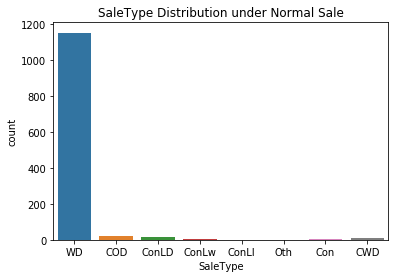

In [237]:
sns.countplot(test[test['SaleCondition']=='Normal']['SaleType'])
plt.title('SaleType Distribution under Normal Sale');

#### Solution

Replace `NaN` with `WD`. 

In [238]:
# Update 'GarageQual' and `GarageCond`
test.loc[2490, ['SaleType']] = 'WD' 
display(test.loc[2490, ['SaleType']])

SaleType    WD
Name: 2490, dtype: object

### 3.14 - Final Check

In [239]:
# missing values dataframes
df_missing_train = pd.DataFrame(train.isna().sum(), columns=['train_missing'])
df_missing_test = pd.DataFrame(test.isna().sum(), columns=['test_missing'])

# display missing dataframes side by sideb
display_side_by_side(df_missing_train, df_missing_test)

,train_missing
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


All Good!

In [240]:
# Store cleaned data for Part 2
%store train
%store test

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)
